In [1]:
### ***Problem Statement
# xyz company's 2014-2018 sales data to identify key revenue and profit drivers across products,
# channels and regions , uncover sesional trends and outliers and align performance against budgets.
# Use these insights to optimize pricing, promotions, and market expansion for sustainble growth and reduced concentration risk.

In [2]:
### importing librearies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sheets = pd.read_excel("Regional Sales Dataset.xlsx", sheet_name=None)
# print(sheets)

# Assign dataframes to each sheet
df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']

df_sales.shape

(64104, 12)

In [3]:
print("df_sales shape: ",(df_sales.shape))
print("df_customers shape: ",(df_customers.shape))
print("df_products shape: ",(df_products.shape))
print("df_regions shape: ",(df_regions.shape))
print("df_state_reg shape: ",(df_state_reg.shape))
print("df_budgets shape: ",(df_budgets.shape))

df_sales shape:  (64104, 12)
df_customers shape:  (175, 2)
df_products shape:  (30, 2)
df_regions shape:  (994, 15)
df_state_reg shape:  (49, 3)
df_budgets shape:  (30, 2)


In [4]:
df_customers.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [5]:
df_state_reg.head(5)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [6]:
new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg[1:].reset_index(drop=True)

df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [7]:
df_budgets.head(5)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [8]:
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [9]:
df_regions.isnull().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [10]:
### Data cleaning and wrangling

# merge with customers
df = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [11]:
# merge with products
df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [12]:
# merge with Regions
df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [13]:
# merge with State Regions
df = df.merge(
    df_state_reg[["State Code", "Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [14]:
# merge with Budgets
df = df.merge(
    df_budgets,
    how='left',
    on= 'Product Name'
)

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,1085037.329


In [15]:
## clean up redundant columns
cols_to_drop = ['Customer Index','Index','id','State Code']
df = df.drop(columns = cols_to_drop, errors = 'ignore')

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [16]:
# convert all columns to lower case for consistency and easier access
df.columns = df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [17]:
## keep the imp columns and delete the columns that we dont need
cols_to_keep = [
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'county',
    'state',
    'region',
    'latitude',
    'longitude',
    '2017 budgets'
]

df = df[cols_to_keep]
df.head(5)

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [18]:
## rename the columns
df = df.rename(columns={
    'ordernumber': 'order_number',
    'orderdate': 'order_date',
    'customer names': 'customer_name',
    'product name': 'product_name',
    'order quantity': 'order_quantity',
    'unit price': 'unit_price',
    'line total': 'revenue',
    'total unit cost': 'cost',
    'state': 'state_name',
    'latitude': 'lat',
    'longitude': 'lon',
    '2017 budgets': 'budget'
})    
df.head(1)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,county,state_name,region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231


In [19]:
# Blank out budgets for non 2017 orders
df.loc[df['order_date'].dt.year != 2017,'budget'] = pd.NA

df[['order_date','product_name','revenue','budget']].head(5)

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [20]:
df[['order_date','product_name','revenue','budget']].tail(5)

,order_date,product_name,revenue,budget
64099,2018-02-28,Product 26,21788.4,NaN
64100,2018-02-28,Product 21,5185.8,NaN
64101,2018-02-28,Product 13,43483.0,NaN
64102,2018-02-28,Product 20,27717.9,NaN
64103,2018-02-28,Product 15,7986.4,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_number    64104 non-null  object        
 1   order_date      64104 non-null  datetime64[ns]
 2   customer_name   64104 non-null  object        
 3   channel         64104 non-null  object        
 4   product_name    64104 non-null  object        
 5   order_quantity  64104 non-null  int64         
 6   unit_price      64104 non-null  float64       
 7   revenue         64104 non-null  float64       
 8   cost            64104 non-null  float64       
 9   state_code      64104 non-null  object        
 10  county          64104 non-null  object        
 11  state_name      64104 non-null  object        
 12  region          64104 non-null  object        
 13  lat             64104 non-null  float64       
 14  lon             64104 non-null  float64       
 15  bu

In [22]:
## Filter the dataset to include only records from year 2017
df_2017 = df[df['order_date'].dt.year == 2017]

In [23]:
df.isnull().sum()

order_number          0
order_date            0
customer_name         0
channel               0
product_name          0
order_quantity        0
unit_price            0
revenue               0
cost                  0
state_code            0
county                0
state_name            0
region                0
lat                   0
lon                   0
budget            48841
dtype: int64

In [24]:
df_2017.head(5)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,county,state_name,region,lat,lon,budget
46363,SO - 0002544,2017-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,Hudson County,New Jersey,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2017-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Mesa County,Colorado,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2017-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,Los Angeles County,California,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2017-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Dubuque County,Iowa,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2017-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Hernando County,Florida,South,28.47689,-82.52546,3050087.565


In [25]:
#### Feature Engineering
df.head(5)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,county,state_name,region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN


In [26]:
print(df.columns.tolist())

['order_number', 'order_date', 'customer_name', 'channel', 'product_name', 'order_quantity', 'unit_price', 'revenue', 'cost', 'state_code', 'county', 'state_name', 'region', 'lat', 'lon', 'budget']


In [27]:
df['total_cost'] = df['order_quantity'] * df['cost']

In [28]:
df['profit'] = df['revenue'] - df['total_cost']

df['profit_margin_pct'] = df['profit']/df['revenue']*100

In [29]:
df.head(5)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,county,state_name,region,lat,lon,budget,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0


In [36]:
df.to_csv('cleaned_data.csv', index=False)

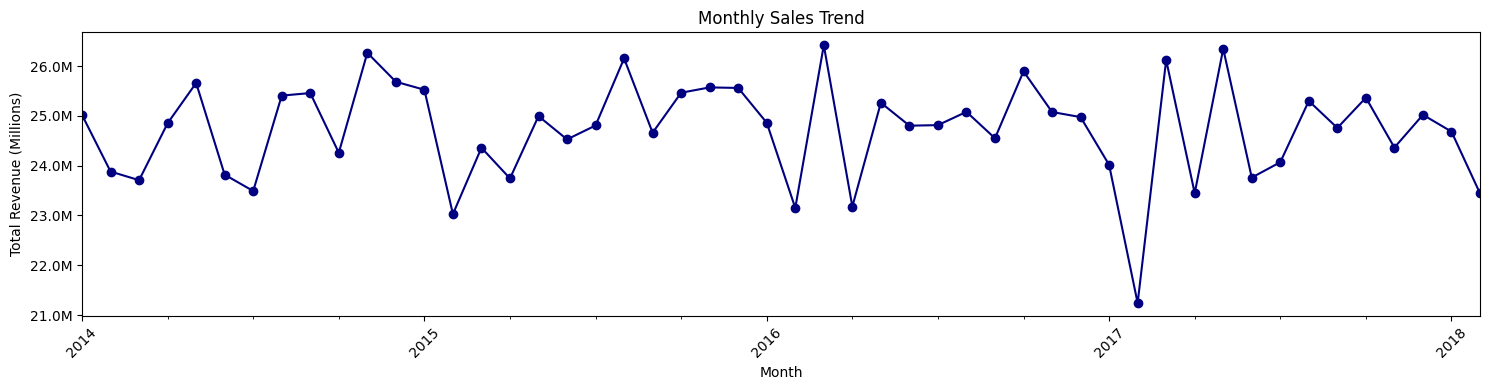

In [30]:
### EDA
df['order_month'] = df['order_date'].dt.to_period('M')

monthly_sales = df.groupby('order_month')['revenue'].sum()

plt.figure(figsize=(15,4))

monthly_sales.plot(marker='o',color='navy')
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [38]:
# Ensure 'order_date' is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Create year and month columns
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

# Filter out Jan and Feb 2018
df_new = df[~((df['year'] == 2018) & (df['month'].isin([1, 2])))]

In [39]:
df.to_csv('newProject.csv', index=False)

C:\Users\parma\AppData\Local\Temp\ipykernel_4452\3456871838.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.loc[:,'month_name'] = df_new['order_date'].dt.strftime('%b')  # Jan, Feb, etc.


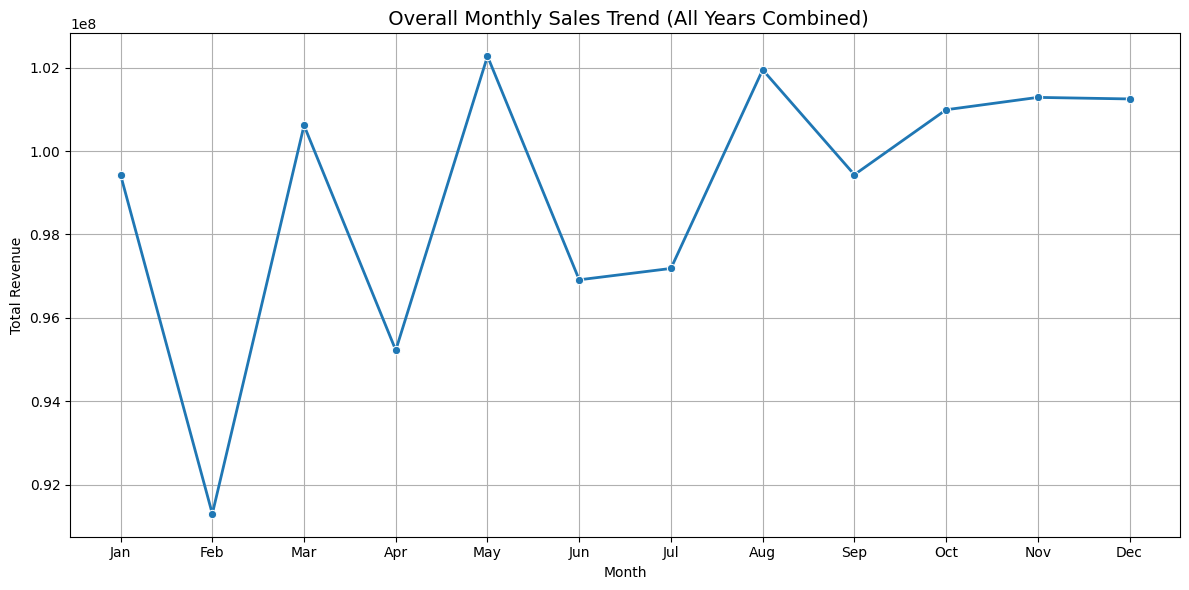

In [32]:
# Step 1: Ensure 'order_date' is datetime
df_new.loc[:,'order_date'] = pd.to_datetime(df_new['order_date'], errors='coerce')

# Step 2: Extract calendar month
df_new.loc[:,'month'] = df_new['order_date'].dt.month

# Optional: Add month names (for prettier x-axis)
df_new.loc[:,'month_name'] = df_new['order_date'].dt.strftime('%b')  # Jan, Feb, etc.

# Step 3: Group by month and aggregate total revenue
monthly_sales = df_new.groupby('month_name')['revenue'].sum().reindex(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)

# Step 4: Plot
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', linewidth=2)

plt.title(' Overall Monthly Sales Trend (All Years Combined)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

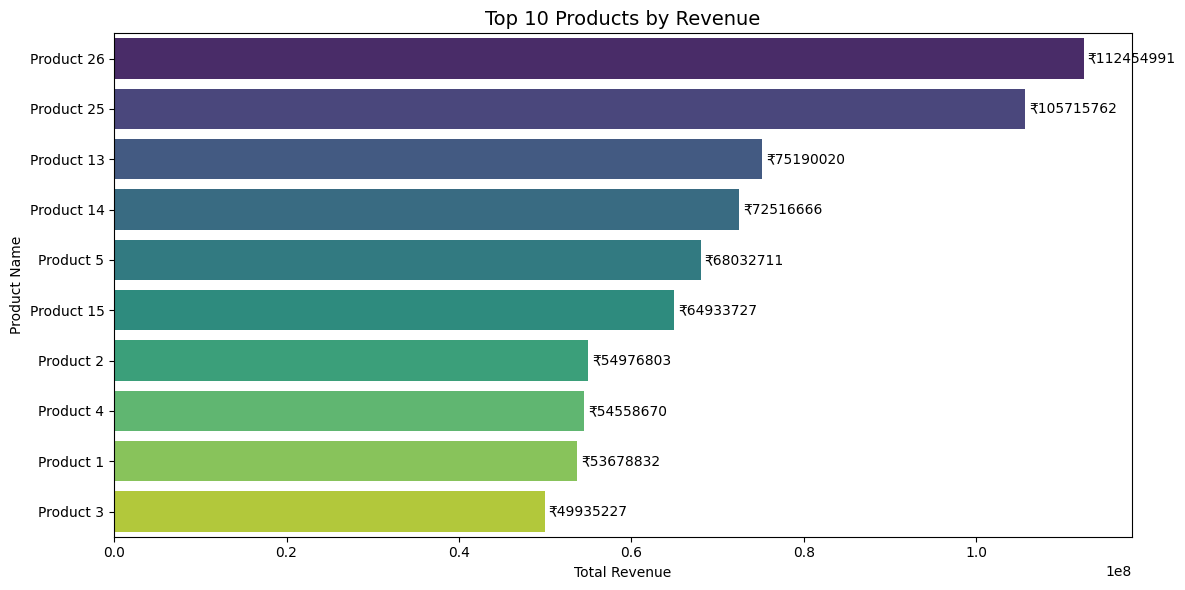

In [33]:
# Step 1: Group by product and sum revenue
top_products = df_new.groupby('product_name')['revenue'].sum().sort_values(ascending=False).head(10).reset_index()

# Step 2: Plot
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=top_products,
    x='revenue',
    y='product_name',
    hue='product_name',          # Required to avoid warning
    palette='viridis',
    legend=False                 # Hide legend
)

# Step 3: Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='₹%.0f', label_type='edge', padding=3)

# Step 4: Customize
plt.title('Top 10 Products by Revenue', fontsize=14)
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

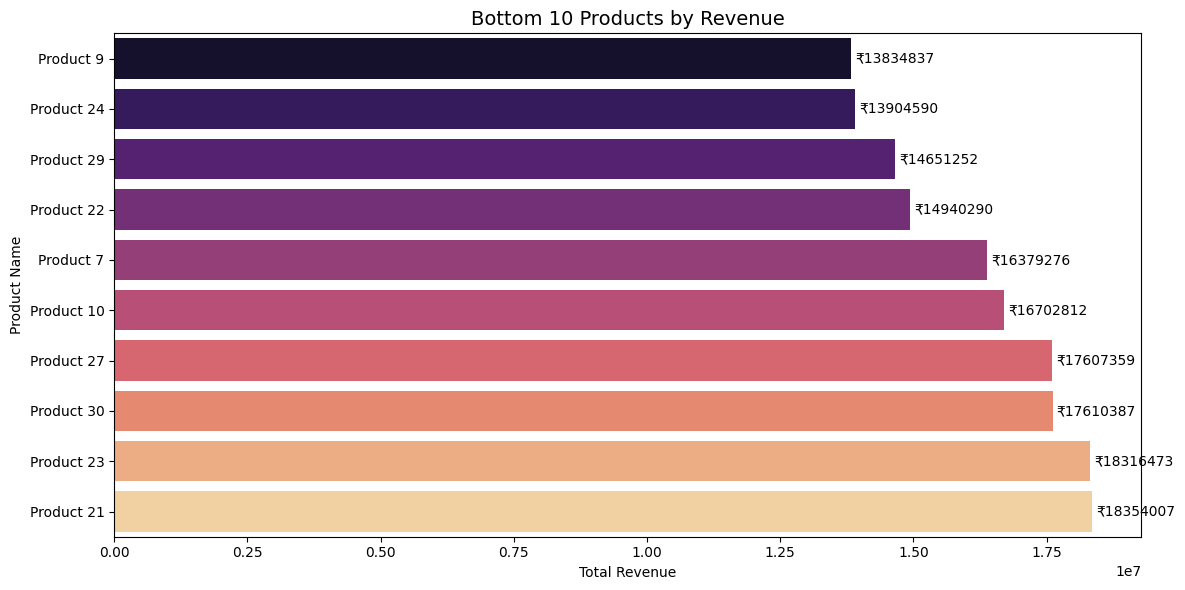

In [34]:
# Step 1: Group by product and sum revenue
bottom_products = df_new.groupby('product_name')['revenue'].sum().sort_values(ascending=True).head(10).reset_index()

# Step 2: Plot
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=bottom_products,
    x='revenue',
    y='product_name',
    hue='product_name',           # Avoids Seaborn warning
    palette='magma',              # Different palette for variety
    legend=False
)

# Step 3: Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='₹%.0f', label_type='edge', padding=3)

# Step 4: Customize
plt.title('Bottom 10 Products by Revenue', fontsize=14)
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

In [35]:
### Sales by channel
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=True)
plt.figure(figsize=(5,5))

plt.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct= '%1.1f%%',
    color=sns.color_palette('coolwarm')
)
plt.title('Total sales by channel')
plt.tight_layout()
plt.show()

TypeError: pie() got an unexpected keyword argument 'color'

<Figure size 500x500 with 0 Axes>

In [ ]:
## Average order value (AOV) Distribution
aov = df.groupby('order_number')['revenue'].sum()
plt.figure(figsize=(12,4))
plt.hist(
    aov,
    bins=50,
    color='skyblue',
    edgecolor='black'
)

plt.title('Distribution of average Order value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

plt.tight_layout()
plt.show()

In [ ]:
# Unit price Distribution per product
# Top 10 states by revenue and order count
# Average profit marging by channel
# top and bottom 10 customers by revenue
# Customer segmentation: revenue vs profit Margin
# Correlation Heatmap

In [ ]:
# Set figure size
plt.figure(figsize=(14,6))

# Plot boxplot: Unit Price Distribution per Product
sns.boxplot(data=df, x='product_name', y='unit_price', palette='Set2')

# Customize
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title('Unit Price Distribution per Product', fontsize=14)
plt.xlabel('Product Name')
plt.ylabel('Unit Price')
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Group by state and calculate metrics
state_summary = df.groupby('state_name').agg({
    'revenue': 'sum',
    'order_number': 'nunique'  # count of unique orders
}).rename(columns={'order_number': 'order_count'}).reset_index()

# Step 2: Get top 10 states by revenue
top_states = state_summary.sort_values(by='revenue', ascending=False).head(10)

# Step 3: Reshape for grouped barplot (melt the dataframe)
melted = top_states.melt(id_vars='state_name', value_vars=['revenue', 'order_count'],
                         var_name='metric', value_name='value')

# Step 4: Plot
plt.figure(figsize=(12,6))
sns.barplot(data=melted, x='state_name', y='value', hue='metric', palette='Set2')

# Customize
plt.title('Top 10 States by Revenue and Order Count', fontsize=14)
plt.xlabel('State')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()